In [1]:
import geopandas
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
from refuelplot import *
setup()
sns.set_style("darkgrid")

from paths import *

In [2]:
startGWA2 = '1987'
startGWA3 = '2008'
endGWA2 = '2016'
endGWA3 = '2017'

# South Africa

In [3]:
shpZAF = geopandas.read_file(data_path + '/country_shapefiles/ZAF/zaf_admbnda_adm1_2016SADB_OCHA.shp')

In [4]:
cfEg2_ZAF = xr.open_dataarray(results_path + '/ZAF/cf_ERA_GWA2.nc')
cfEg3_ZAF = xr.open_dataarray(results_path + '/ZAF/cf_ERA_GWA3.nc')
cfMg2_ZAF = xr.open_dataarray(results_path + '/ZAF/cf_MERRA_GWA2.nc')
cfMg3_ZAF = xr.open_dataarray(results_path + '/ZAF/cf_MERRA_GWA3.nc')

In [7]:
max(cfEg2_ZAF.max().values,cfMg2_ZAF.max().values,cfEg3_ZAF.max().values,cfMg3_ZAF.max().values)

array(7.0380387, dtype=float32)

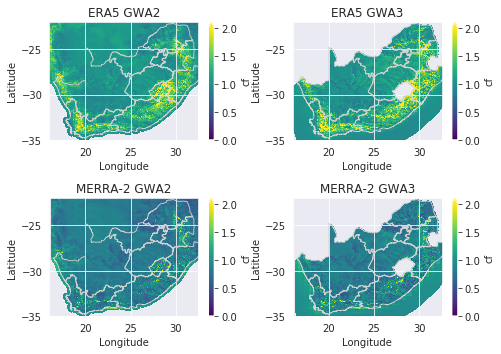

In [41]:
data = [cfEg2_ZAF,cfEg3_ZAF,cfMg2_ZAF,cfMg3_ZAF]
titles = ['ERA5 GWA2','ERA5 GWA3','MERRA-2 GWA2','MERRA-2 GWA3']

fig, axes = plt.subplots(2, 2,figsize=(8,5.4),gridspec_kw = {'hspace':0.5})

for i in range(4):
    axes[int(i/2),i%2].set_xlim(16,32.5)
    axes[int(i/2),i%2].set_ylim(-35,-22)
    data[i].plot.imshow(ax=axes[int(i/2),i%2],vmin=0, vmax=2)
    shpZAF.boundary.plot(ax=axes[int(i/2),i%2],color='lightgray',linewidth=0.8)
    axes[int(i/2),i%2].set_title(titles[i])
    axes[int(i/2),i%2].set_xlabel('Longitude')
    axes[int(i/2),i%2].set_ylabel('Latitude')
plt.savefig(results_path + '/plots/cf_ZAF.png',dpi=300)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc7ea6ae0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc7edb94860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc7ea6aedd8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc7edb942b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc7edb948d0>],
 'means': []}

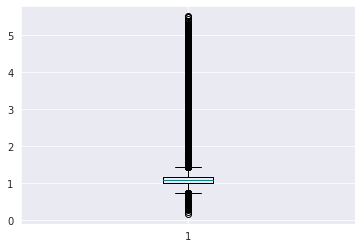

In [38]:
plt.boxplot(pd.Series(cfEg2_ZAF.values.flatten()).dropna())

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_xlim(16,32.5)
ax.set_ylim(-35,-22)
cfEg2_ZAF.plot.imshow(ax=ax)
shpZAF.boundary.plot(ax=ax,color='lightgray',linewidth=0.8)

# New Zealand

In [5]:
shpNZ = geopandas.read_file(data_path + '/country_shapefiles/NZ/CON2017_HD_Clipped.shp')

In [6]:
cfEg2_NZ = xr.open_dataarray(results_path + '/NZ/cf_ERA_GWA2.nc')
cfEg3_NZ = xr.open_dataarray(results_path + '/NZ/cf_ERA_GWA3.nc')
cfMg2_NZ = xr.open_dataarray(results_path + '/NZ/cf_MERRA_GWA2.nc')
cfMg3_NZ = xr.open_dataarray(results_path + '/NZ/cf_MERRA_GWA3.nc')

In [12]:
max(cfEg2_NZ.max().values,cfMg2_NZ.max().values,cfEg3_NZ.max().values,cfMg3_NZ.max().values)

array(11.004673, dtype=float32)

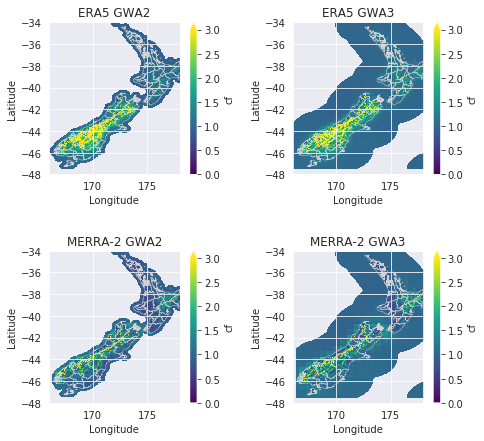

In [40]:
data = [cfEg2_NZ,cfEg3_NZ,cfMg2_NZ,cfMg3_NZ]
titles = ['ERA5 GWA2','ERA5 GWA3','MERRA-2 GWA2','MERRA-2 GWA3']

fig, axes = plt.subplots(2, 2,figsize=(8,7),gridspec_kw = {'hspace':0.5})

for i in range(4):
    axes[int(i/2),i%2].set_xlim(166,178)
    axes[int(i/2),i%2].set_ylim(-34,-48)
    try:
        data[i].sel(longitude=slice(160,180),latitude=slice(-34,-48)).plot.imshow(ax=axes[int(i/2),i%2],vmin=0,vmax=3)
    except:
        data[i].sel(lon=slice(160,180),lat=slice(-34,-48)).plot.imshow(ax=axes[int(i/2),i%2],vmin=0,vmax=3)
    shpNZ.to_crs({'init': 'epsg:4326'}).boundary.plot(ax=axes[int(i/2),i%2],color='lightgray',linewidth=0.4)
    axes[int(i/2),i%2].set_title(titles[i])
    axes[int(i/2),i%2].set_xlabel('Longitude')
    axes[int(i/2),i%2].set_ylabel('Latitude')
plt.savefig(results_path + '/plots/cf_NZ.png',dpi=300)

In [ ]:
data = [cfEg2_NZ,cfEg3_NZ,cfMg2_NZ,cfMg3_NZ]
titles = ['ERA5 GWA2','ERA5 GWA3','MERRA-2 GWA2','MERRA-2 GWA3']

fig, axes = plt.subplots(1, 4,figsize=(40,8),gridspec_kw = {'wspace':0.1})

for i in range(4):
    data[i].plot.imshow(ax=axes[i])
    axes[i].set_title(titles[i])

# Brazil

In [7]:
shpBRA = geopandas.read_file(data_path + '/country_shapefiles/BRA/BRA_adm1.shp')

In [8]:
cfEg2_BRA = xr.open_dataarray(results_path + '/BRA/cf_ERA_GWA2.nc')
cfEg3_BRA = xr.open_dataarray(results_path + '/BRA/cf_ERA_GWA3.nc')
cfMg2_BRA = xr.open_dataarray(results_path + '/BRA/cf_MERRA_GWA2.nc')
cfMg3_BRA = xr.open_dataarray(results_path + '/BRA/cf_MERRA_GWA3.nc')

In [20]:
max(cfEg2_BRA.max().values,cfMg2_BRA.max().values,cfEg3_BRA.max().values,cfMg3_BRA.max().values)

array(18.664148, dtype=float32)

In [ ]:
data = [cfEg2_BRA,cfEg3_BRA,cfMg2_BRA,cfMg3_BRA]
titles = ['ERA5 GWA2','ERA5 GWA3','MERRA-2 GWA2','MERRA-2 GWA3']
fig, axes = plt.subplots(2, 2,figsize=(9,5.4),gridspec_kw = {'wspace':0.1,'hspace':0.6})

for i in range(4):
    axes[int(i/2),i%2].set_xlim(-75,-30)
    axes[int(i/2),i%2].set_ylim(-25,5)
    data[i].plot.imshow(ax=axes[int(i/2),i%2],norm=matplotlib.colors.PowerNorm(gamma=0.5),vmin=0,vmax=19)
    shpBRA.boundary.plot(ax=axes[int(i/2),i%2],color='lightgray',linewidth=0.8)
    axes[int(i/2),i%2].set_title(titles[i])
    axes[int(i/2),i%2].set_xlabel('longitude')
    axes[int(i/2),i%2].set_ylabel('latitude')
plt.savefig(results_path + '/plots/cf_BRA.png')

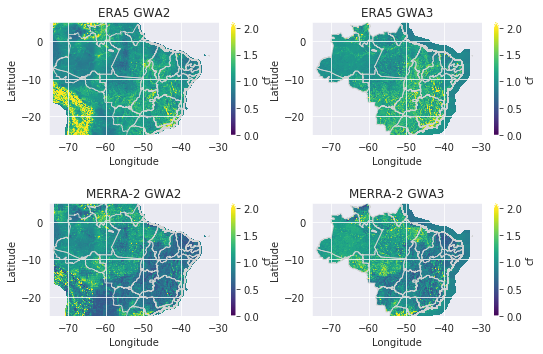

In [39]:
data = [cfEg2_BRA,cfEg3_BRA,cfMg2_BRA,cfMg3_BRA]
titles = ['ERA5 GWA2','ERA5 GWA3','MERRA-2 GWA2','MERRA-2 GWA3']
fig, axes = plt.subplots(2, 2,figsize=(9,5.4),gridspec_kw = {'wspace':0.1,'hspace':0.6})

for i in range(4):
    axes[int(i/2),i%2].set_xlim(-75,-30)
    axes[int(i/2),i%2].set_ylim(-25,5)
    data[i].plot.imshow(ax=axes[int(i/2),i%2],vmin=0,vmax=2)
    shpBRA.boundary.plot(ax=axes[int(i/2),i%2],color='lightgray',linewidth=0.8)
    axes[int(i/2),i%2].set_title(titles[i])
    axes[int(i/2),i%2].set_xlabel('Longitude')
    axes[int(i/2),i%2].set_ylabel('Latitude')
plt.savefig(results_path + '/plots/cf_BRA.png',dpi=300)

In [ ]:
data = [cfEg2_BRA,cfEg3_BRA,cfMg2_BRA,cfMg3_BRA]
titles = ['ERA5 GWA2','ERA5 GWA3','MERRA-2 GWA2','MERRA-2 GWA3']

fig, axes = plt.subplots(1, 4,figsize=(18,2.7),gridspec_kw = {'wspace':0.25})

for i in range(4):
    axes[i].set_xlim(-75,-30)
    axes[i].set_ylim(-25,5)
    data[i].plot.imshow(ax=axes[i])
    shpBRA.boundary.plot(ax=axes[i],color='lightgray',linewidth=0.8)
    axes[i].set_title(titles[i])
plt.savefig(results_path + '/plots/cf_BRA.png')

In [ ]:
fig, axes = plt.subplots(1, 4,figsize=(40,8),gridspec_kw = {'wspace':0.1})

for i in range(4):
    data[i].plot.imshow(ax=axes[i])
    axes[i].set_title(titles[i])

# USA

In [9]:
shpUSA = geopandas.read_file(data_path + '/country_shapefiles/USA/cb_2018_us_state_500k.shp')

In [10]:
cfEg2_USA = xr.open_dataarray(results_path + '/USA/cf_ERA_GWA2.nc')
cfEg3_USA = xr.open_dataarray(results_path + '/USA/cf_ERA_GWA3.nc')
cfMg2_USA = xr.open_dataarray(results_path + '/USA/cf_MERRA_GWA2.nc')
cfMg3_USA = xr.open_dataarray(results_path + '/USA/cf_MERRA_GWA3.nc')

In [24]:
max(cfEg2_USA.max().values,cfMg2_USA.max().values,cfEg3_USA.max().values,cfMg3_USA.max().values)

array(12.552791, dtype=float32)

In [ ]:
data = [cfEg2_USA,cfEg3_USA,cfMg2_USA,cfMg3_USA]
titles = ['ERA5 GWA2','ERA5 GWA3','MERRA-2 GWA2','MERRA-2 GWA3']

fig, axes = plt.subplots(1, 4,figsize=(18,2.7),gridspec_kw = {'wspace':0.25})

for i in range(4):
    axes[i].set_xlim(-125,-67)
    axes[i].set_ylim(25,50)
    data[i].plot.imshow(ax=axes[i])
    shpUSA.boundary.plot(ax=axes[i],color='lightgray',linewidth=0.8)
    axes[i].set_title(titles[i])

In [ ]:
data = [cfEg2_USA,cfEg3_USA,cfMg2_USA,cfMg3_USA]
titles = ['ERA5 GWA2','ERA5 GWA3','MERRA-2 GWA2','MERRA-2 GWA3']

fig, axes = plt.subplots(2, 2,figsize=(13,5.4),gridspec_kw = {'wspace':0.15,'hspace':0.5})


for i in range(4):
    axes[int(i/2),i%2].set_xlim(-125,-67)
    axes[int(i/2),i%2].set_ylim(25,50)
    data[i].plot.imshow(ax=axes[int(i/2),i%2])
    shpUSA.boundary.plot(ax=axes[int(i/2),i%2],color='lightgray',linewidth=0.8)
    axes[int(i/2),i%2].set_title(titles[i])
    plt.savefig(results_path + '/plots/cf_USA.png')

In [ ]:
data = [cfEg2_USA,cfEg3_USA,cfMg2_USA,cfMg3_USA]
titles = ['ERA5 GWA2','ERA5 GWA3','MERRA-2 GWA2','MERRA-2 GWA3']

fig, axes = plt.subplots(2, 2,figsize=(13,5.4),gridspec_kw = {'wspace':0.15,'hspace':0.5})


for i in range(4):
    axes[int(i/2),i%2].set_xlim(-125,-67)
    axes[int(i/2),i%2].set_ylim(25,50)
    data[i].plot.imshow(ax=axes[int(i/2),i%2],norm=matplotlib.colors.PowerNorm(gamma=0.5),vmin=0,vmax=13)
    shpUSA.boundary.plot(ax=axes[int(i/2),i%2],color='lightgray',linewidth=0.8)
    axes[int(i/2),i%2].set_title(titles[i])
    axes[int(i/2),i%2].set_xlabel('longitude')
    axes[int(i/2),i%2].set_ylabel('latitude')
plt.savefig(results_path + '/plots/cf_USA.png')

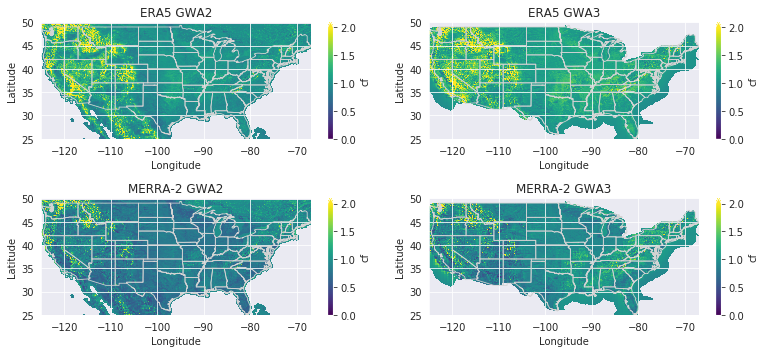

In [42]:
data = [cfEg2_USA,cfEg3_USA,cfMg2_USA,cfMg3_USA]
titles = ['ERA5 GWA2','ERA5 GWA3','MERRA-2 GWA2','MERRA-2 GWA3']

fig, axes = plt.subplots(2, 2,figsize=(13,5.4),gridspec_kw = {'wspace':0.15,'hspace':0.5})


for i in range(4):
    axes[int(i/2),i%2].set_xlim(-125,-67)
    axes[int(i/2),i%2].set_ylim(25,50)
    data[i].plot.imshow(ax=axes[int(i/2),i%2],vmin=0,vmax=2)
    shpUSA.boundary.plot(ax=axes[int(i/2),i%2],color='lightgray',linewidth=0.8)
    axes[int(i/2),i%2].set_title(titles[i])
    axes[int(i/2),i%2].set_xlabel('Longitude')
    axes[int(i/2),i%2].set_ylabel('Latitude')
plt.savefig(results_path + '/plots/cf_USA.png',dpi=300)

In [ ]:
fig, axes = plt.subplots(1, 4,figsize=(40,8),gridspec_kw = {'wspace':0.1})

for i in range(4):
    data[i].plot.imshow(ax=axes[i])
    axes[i].set_title(titles[i])

## compare GWA2 and GWA3 cfs

In [11]:
def dif_g2_g3(gwa2,gwa3,ds):
    if ds=='E':
        gwa3ig2 = gwa3.interp(longitude = gwa2.longitude.values,
                              latitude = gwa2.latitude.values,
                              method='nearest')
    else:
        gwa3ig2 = gwa3.interp(lon = gwa2.lon.values,
                              lat = gwa2.lat.values,
                              method='nearest')
    difg2g3 = (gwa3ig2-gwa2).values.flatten()
    return(difg2g3[~np.isnan(difg2g3)])

In [15]:
def plot_difcf_country(Egwa2,Egwa3,Mgwa2,Mgwa3,ax,title):
    difE = dif_g2_g3(Egwa2,Egwa3,'E')
    difM = dif_g2_g3(Mgwa2,Mgwa3,'M')
    difs = pd.DataFrame({'Dataset':['ERA5']*len(difE) + ['MERRA-2']*len(difM),
                        'correction factor GWA3 - correction factor GWA2':np.append(difE,difM)})
    sns.boxplot(x='Dataset',y='correction factor GWA3 - correction factor GWA2',data=difs,ax=ax)
    ax.set_title(title)

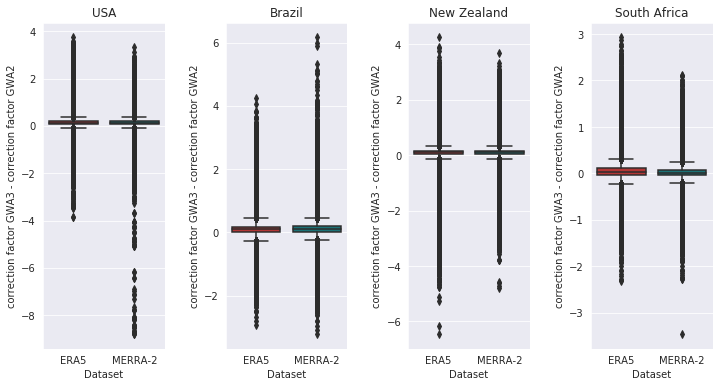

In [16]:
fig, axes = plt.subplots(1, 4,figsize=(12,6),gridspec_kw = {'wspace':0.5})

plot_difcf_country(cfEg2_USA,cfEg3_USA,cfMg2_USA,cfMg3_USA,axes[0],'USA')
plot_difcf_country(cfEg2_BRA,cfEg3_BRA,cfMg2_BRA,cfMg3_BRA,axes[1],'Brazil')
plot_difcf_country(cfEg2_NZ,cfEg3_NZ,cfMg2_NZ,cfMg3_NZ,axes[2],'New Zealand')
plot_difcf_country(cfEg2_ZAF,cfEg3_ZAF,cfMg2_ZAF,cfMg3_ZAF,axes[3],'South Africa')
plt.savefig(results_path + '/plots/cf_MBE_GWA2_GWA3.png')